# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [3]:
!pip install pandas
!pip install matplotlib
!pip install plotly
!pip install seaborn
!pip install pickle-mixin
!pip install statsmodels
!pip install sklearn


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import pickle
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [5]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv', sep=',')
df_raw

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df_raw.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
df_raw[df_raw['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [10]:
# invalanced data
df_raw["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
df_filter = df_raw.copy()
df_filter = df_raw[(df_raw["BMI"] > 0 ) & (df_raw["BloodPressure"] > 0) & (df_raw["Glucose"] > 0)]
df_filter

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
print('The observations that have BMI, blood pressure or glucose equal to zero are removed.')
print(f'By doing this we lose {len(df_raw)-len(df_filter)} observations.')

The observations that have BMI, blood pressure or glucose equal to zero are removed.
By doing this we lose 44 observations.


In [13]:
df = df_filter.copy() 
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,-0.095683,-0.080059,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.074381,0.337896,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.011777,-0.046856,0.287403,-0.000075,0.324897,0.166703
SkinThickness,-0.095683,0.074381,0.011777,1.000000,0.420874,0.401528,0.176253,-0.128908,0.092030
Insulin,-0.080059,0.337896,-0.046856,0.420874,1.000000,0.191831,0.182656,-0.049412,0.145488
BMI,0.012342,0.223276,0.287403,0.401528,0.191831,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.176253,0.182656,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,-0.128908,-0.049412,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.092030,0.145488,0.299375,0.184947,0.245741,1.000000


<AxesSubplot:>

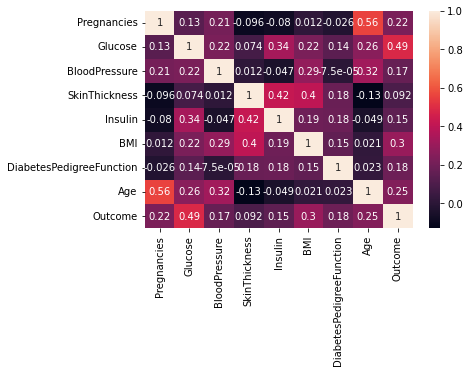

In [15]:
sns.heatmap(df.corr(), annot=True)

In [16]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

In [17]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 534 to 273
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               543 non-null    int64  
 1   Glucose                   543 non-null    int64  
 2   BloodPressure             543 non-null    int64  
 3   SkinThickness             543 non-null    int64  
 4   Insulin                   543 non-null    int64  
 5   BMI                       543 non-null    float64
 6   DiabetesPedigreeFunction  543 non-null    float64
 7   Age                       543 non-null    int64  
 8   Outcome                   543 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.4 KB


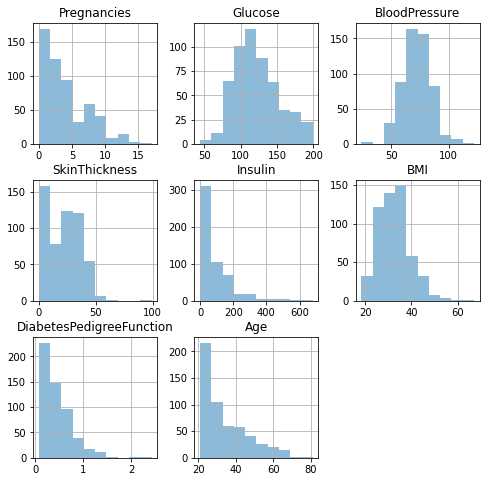

In [18]:
# Perform univariate analysis - histograms
X_train.hist(figsize=(8,8), alpha=0.5)
plt.show()

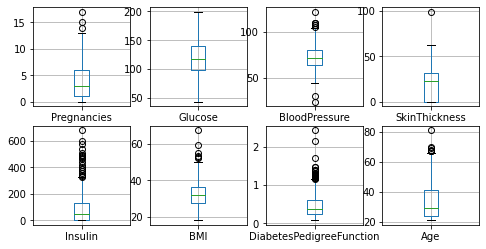

In [19]:
# Perform univariate analysis - boxplots
fig, ax = plt.subplots(2,4, figsize=(8,4))
axs = ax.flatten()
for i in range(len(axs)):
    X_train._get_numeric_data().iloc[:,i].to_frame().boxplot(ax=axs[i])

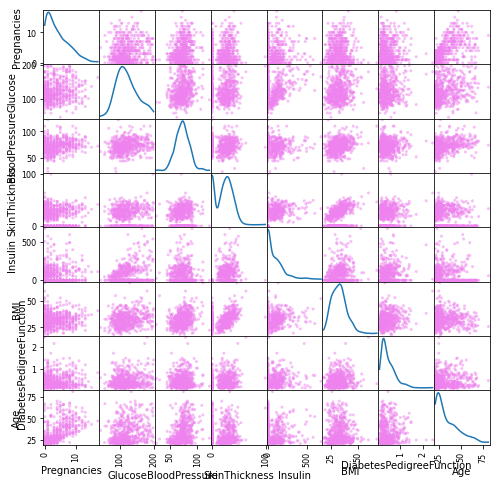

In [20]:
# Perform bivariate analysis - numericals
pd.plotting.scatter_matrix(X_train, diagonal='kde', figsize=(8,8), c='Violet')
plt.show()

In [21]:
df_train.corr().style.background_gradient(cmap='Blues')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128695,0.203663,-0.059651,-0.041003,-0.007470,0.019356,0.562590,0.214185
Glucose,0.128695,1.000000,0.228245,0.069994,0.313630,0.214476,0.126815,0.241120,0.476305
BloodPressure,0.203663,0.228245,1.000000,-0.003589,-0.029131,0.276175,0.028567,0.340978,0.182279
SkinThickness,-0.059651,0.069994,-0.003589,1.000000,0.434014,0.378657,0.160786,-0.131113,0.103272
Insulin,-0.041003,0.313630,-0.029131,0.434014,1.000000,0.180870,0.144517,-0.059335,0.154062
BMI,-0.007470,0.214476,0.276175,0.378657,0.180870,1.000000,0.155318,-0.014559,0.303647
DiabetesPedigreeFunction,0.019356,0.126815,0.028567,0.160786,0.144517,0.155318,1.000000,0.024778,0.231706
Age,0.562590,0.241120,0.340978,-0.131113,-0.059335,-0.014559,0.024778,1.000000,0.228164
Outcome,0.214185,0.476305,0.182279,0.103272,0.154062,0.303647,0.231706,0.228164,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

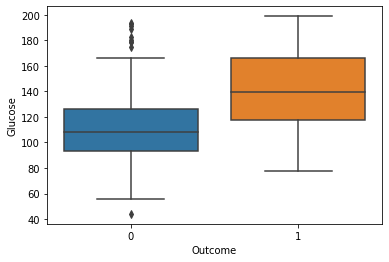

In [22]:
sns.boxplot(x="Outcome", y="Glucose", data=df_train)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

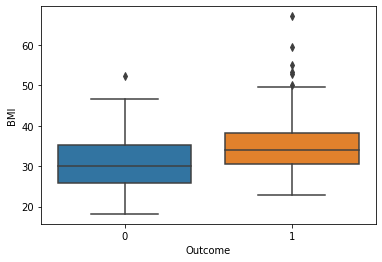

In [23]:
sns.boxplot(x="Outcome", y="BMI", data=df_train)

# Model

In [24]:
model = DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(X_train, y_train)

print('Accuracy model - train set:', model.score(X_train, y_train))
print('Accuracy model - test set:', model.score(X_test, y_test))

Accuracy model - train set: 1.0
Accuracy model - test set: 0.7182320441988951


In [27]:
clf_pred = model.predict(X_test)

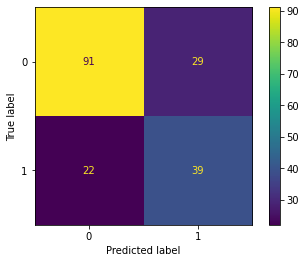

In [30]:
cm = confusion_matrix(y_test, clf_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=model.classes_)
disp.plot()

plt.show()

In [31]:
print('Classification report - Model')
print('################################')
print(classification_report(y_test,clf_pred))

Classification report - Model
################################
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       120
           1       0.57      0.64      0.60        61

    accuracy                           0.72       181
   macro avg       0.69      0.70      0.69       181
weighted avg       0.73      0.72      0.72       181



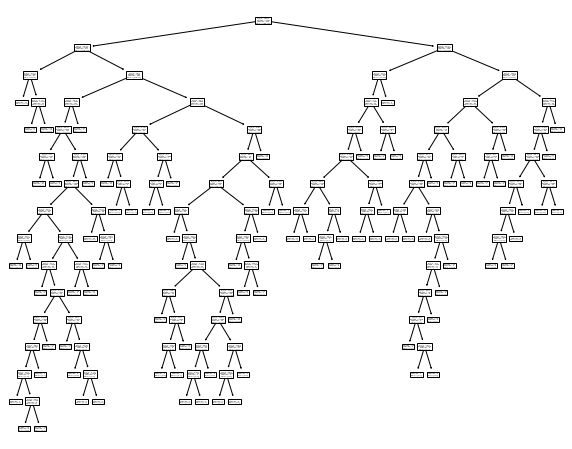

In [33]:
plt.figure(figsize=(10,8))
tree.plot_tree(model)
plt.show()

In [34]:
# hiperparams
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10), 'min_samples_split':range(1,10), 'min_samples_leaf': range(1,5)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), params, verbose=1, n_jobs=-1,cv=3)
grid.fit(X_train, y_train)
print('Best hyperparameters selected by grid search and cross validation')
print('--------------------------------------------------------------')
grid.best_params_ 

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best hyperparameters selected by grid search and cross validation
--------------------------------------------------------------


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
216 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 265, in fit
    check_scala

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [37]:
model_cv = grid.best_estimator_
model_cv

DecisionTreeClassifier(max_depth=4, min_samples_split=3, random_state=0)

In [38]:
print('Accuracy of tree selected by CV in train set:',grid.score(X_train, y_train))

Accuracy of tree selected by CV in train set: 0.8250460405156538


In [40]:
y_pred = model_cv.predict(X_test)
print('Accuracy of tree selected by CV in test set:',np.mean(y_test==y_pred))

print('Accuracy of tree selected by CV in test set:',grid.score(X_test, y_test))

Accuracy of tree selected by CV in test set: 0.7237569060773481
Accuracy of tree selected by CV in test set: 0.7237569060773481


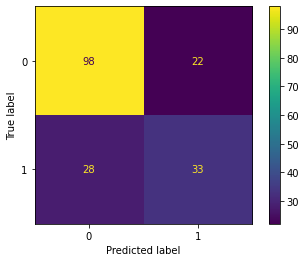

In [41]:
cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=grid.classes_)
disp.plot()

plt.show()

In [42]:
print('Classification report - Model 2')
print('---------------------------------')
print(classification_report(y_test,y_pred))

Classification report - Model 2
---------------------------------
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       120
           1       0.60      0.54      0.57        61

    accuracy                           0.72       181
   macro avg       0.69      0.68      0.68       181
weighted avg       0.72      0.72      0.72       181



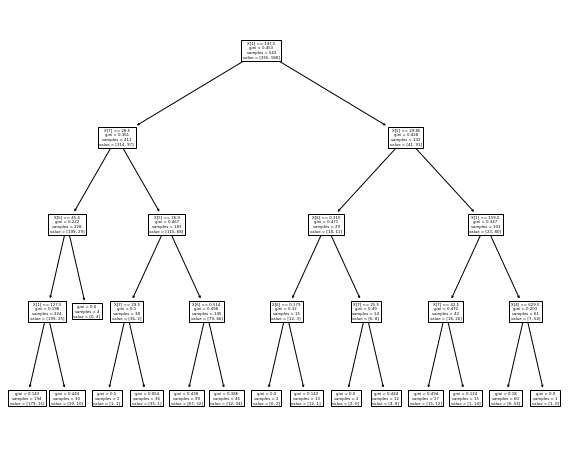

In [43]:
plt.figure(figsize=(10,8))
tree.plot_tree(model_cv)
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
print('Accuracy RFC:', rfc.score(X_test, y_test))

Accuracy RFC: 0.7679558011049724


In [46]:
param_grid = [{'max_depth': [8, 12, 16], 
         'min_samples_split': [12, 16, 20], 
         'criterion': ['gini', 'entropy']}]

rfc=RandomForestClassifier(random_state=1107)
grid_rfc=GridSearchCV(estimator=rfc,param_grid=param_grid, cv=5, n_jobs=-1,verbose=2)
grid_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..criterion=gini, max_depth=8, min_samples_split=12; total time=   0.5s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=12; total time=   0.5s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=20; total time=   0.5s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=12; total time=   0.5s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=16; total time=   0.5s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=12; total time=   0.6s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=16; total time=   0.6s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=16; total time=   0.6s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=12; total time=   0.6s
[CV] END .criterion=gini, max_depth=12, min_samples_split=12; total time=   0.5s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=20; total time=   0.6s
[CV] END ..criterion=gini, max_depth=8, min_samp

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1107),
             n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [8, 12, 16],
                          'min_samples_split': [12, 16, 20]}],
             verbose=2)

In [47]:
print('Best parameters:', grid_rfc.best_params_) 

Best parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 20}


In [48]:
model_rfc_cv = grid_rfc.best_estimator_

In [50]:
y_pred_rfc_cv = model_rfc_cv.predict(X_test)
print('Accuracy of random forest selected by CV in test set (grid search):',grid_rfc.score(X_test, y_test))

Accuracy of random forest selected by CV in test set (grid search): 0.7900552486187845


Feature: 0, Score: 0.06858
Feature: 1, Score: 0.30694
Feature: 2, Score: 0.06693
Feature: 3, Score: 0.05409
Feature: 4, Score: 0.06689
Feature: 5, Score: 0.16852
Feature: 6, Score: 0.11918
Feature: 7, Score: 0.14886


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


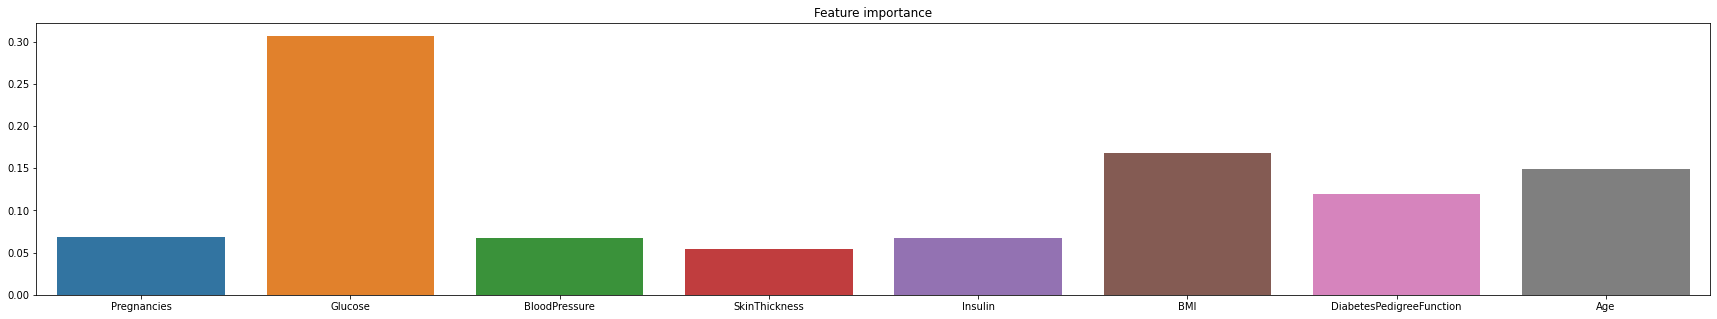

In [51]:
importance = model_rfc_cv.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.figure(figsize=(30,5))
columns = X.columns
sns.barplot(columns, importance)
plt.title('Feature importance')
plt.show()

In [52]:
filename = '../models/final_model.sav'
pickle.dump(model_rfc_cv, open(filename, 'wb'))